In [1]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Replace target values with target names
iris_df['target'] = iris_df['target'].map(
    {
        0: iris.target_names[0],
        1: iris.target_names[1],
        2: iris.target_names[2]
    }
)

# Display the DataFrame
iris_df


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [3]:
from sklearn.model_selection import train_test_split

X = iris_df.drop('target', axis=1)  # Features
y = iris_df['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Print the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


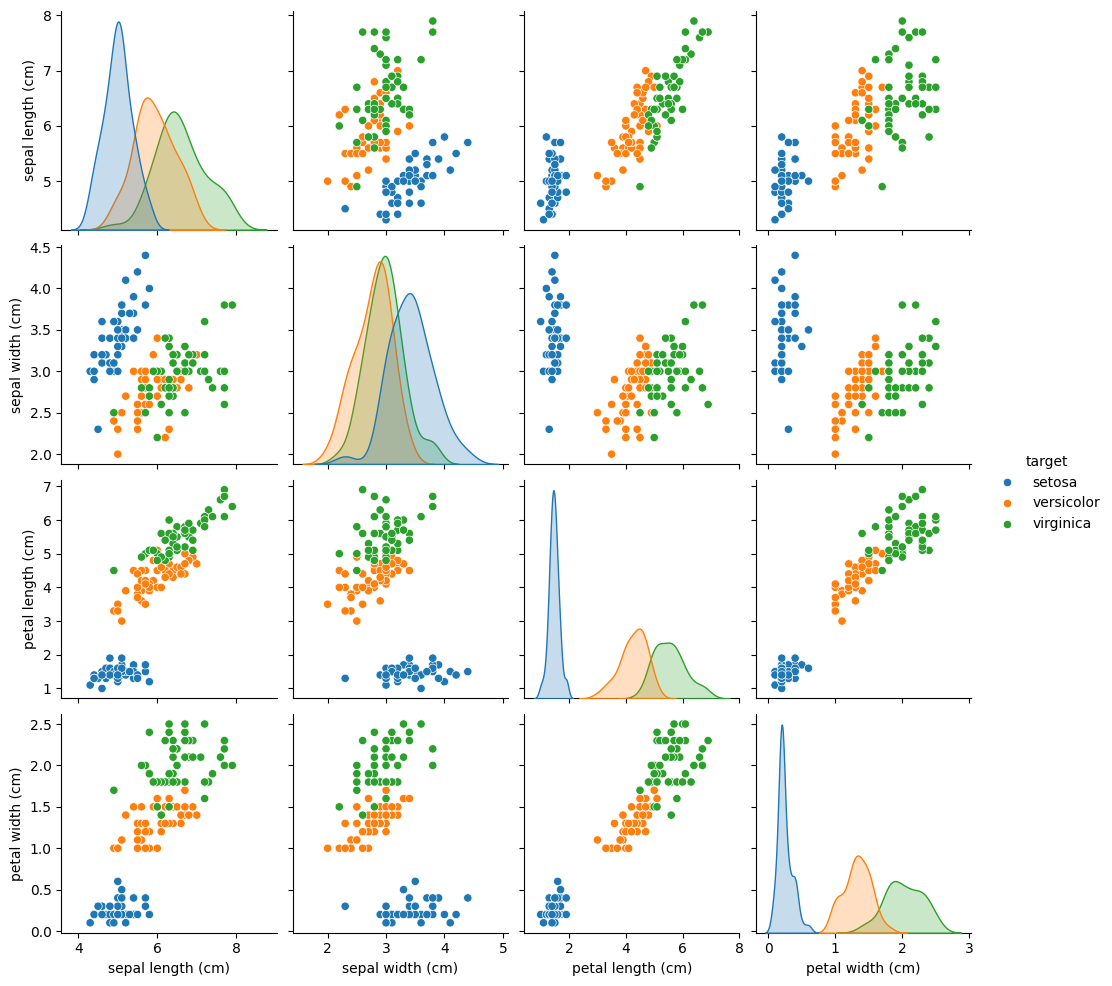

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_df, hue='target')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



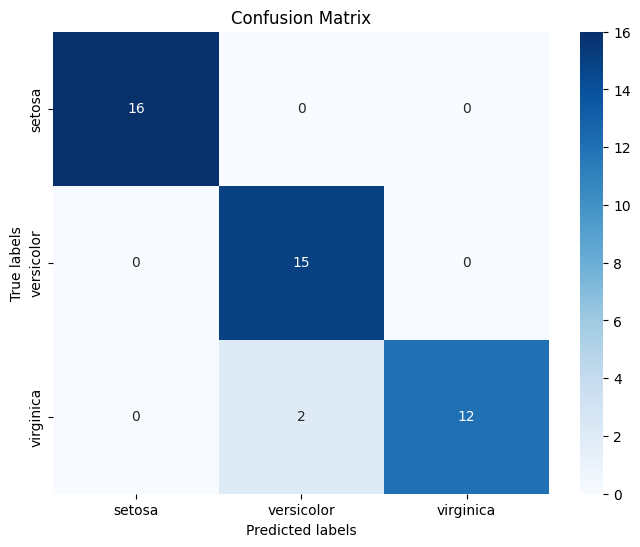

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## After this we just end up trying out linear regression again to see how well it does

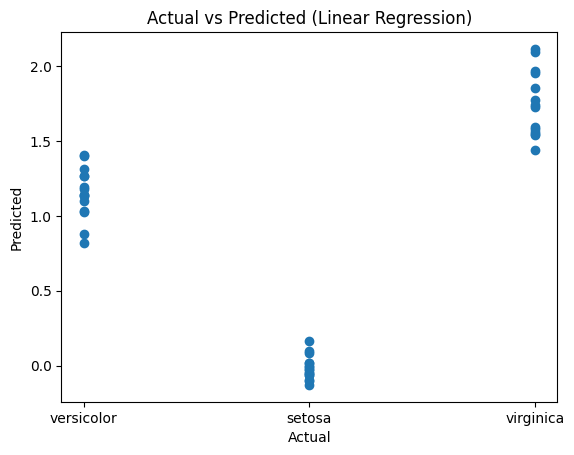

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
from sklearn.linear_model import LinearRegression

y_train_num = y_train.map(
    {
        iris.target_names[0] : 0,
        iris.target_names[1] : 1,
        iris.target_names[2] : 2
    }
)

y_train_num

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train_num)

# Make predictions on the testing set
y_pred_linear = linear_model.predict(X_test)

# Round predictions to the nearest integer
y_pred_linear_rounded = y_pred_linear.round().astype(int)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_linear)
plt.title('Actual vs Predicted (Linear Regression)')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
iris.target_names

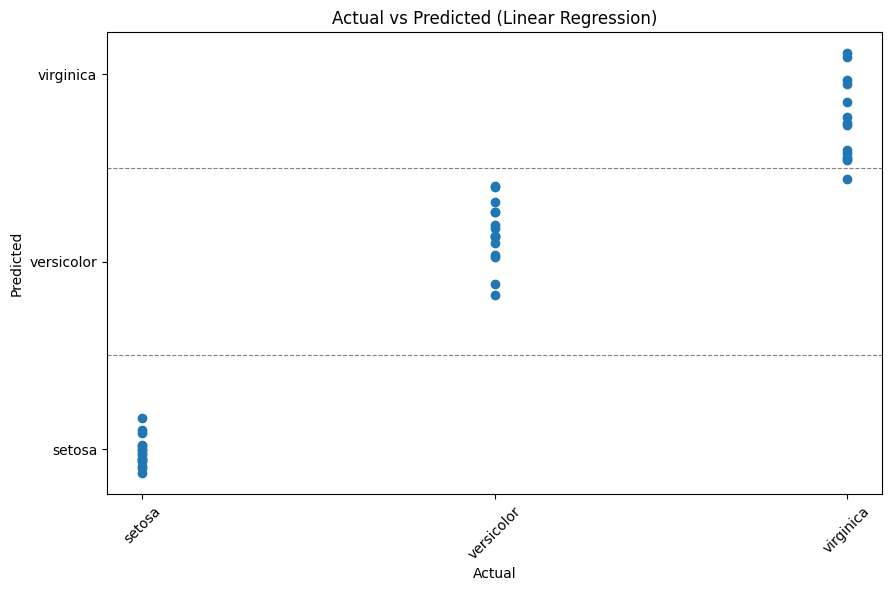

In [8]:
target_map = {name: idx for idx, name in enumerate(iris.target_names)}

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.map(target_map), y_pred_linear)
plt.xticks(ticks=range(len(iris.target_names)), labels=iris.target_names, rotation=45)
plt.yticks(ticks=range(len(iris.target_names)), labels=iris.target_names)
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axhline(y=0.5, color='grey', linestyle='--', linewidth=0.8)
plt.axhline(y=1.5, color='grey', linestyle='--', linewidth=0.8)
plt.show()